In [1]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

In [1]:
import pandas as pd
import datetime 
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import datetime
import quandl

C:\Users\hanif\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl

In [2]:
ac = 'AC.TO'
trz = 'TRZ.TO'      # Transat A.T. Inc. (TRZ.TO)
west = 'WJT.TO'     # WestJet Airlines Ltd. (WJA.TO)
cn = 'CNI'         # 'CNI' (Canadian National Railway)
# EXPE (online travel shopping company) 
# AAL American Airlines Groups Inc
# LHA.DE (Lufthunza)
cost = 'COST'   # Costco Wholesale Corporation
oil = 'BZ=F'

In [3]:
datetime.datetime.now()

datetime.datetime(2020, 8, 30, 14, 16, 21, 623868)

In [4]:
var = ac
x = datetime.datetime.now()
# x = var + '_' + str(x)[0:10] + "_" +str(x)[11:13] + str(x)[14:16]+ '.csv'
x = var + '_' + str(x)[0:10] + "_" +str(x)[11:13] + '.csv'
x

'AC.TO_2020-08-30_14.csv'

In [5]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

df = web.DataReader(var, 'yahoo', start , end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-24,17.000000,16.150000,16.200001,16.969999,7138499,16.969999
2020-08-25,17.330000,16.469999,17.100000,16.680000,4660719,16.680000
2020-08-26,16.754999,16.360001,16.690001,16.500000,3812658,16.500000
2020-08-27,17.299999,16.709999,16.780001,17.190001,9343146,17.190001
2020-08-28,17.990000,17.299999,17.299999,17.990000,8387496,17.990000


In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,26.209999,25.799999,25.90,26.190001,977849,26.190001
2018-01-03,26.240000,25.165001,26.24,25.370001,2146178,25.370001
2018-01-04,25.360001,24.980000,25.25,24.990000,1049620,24.990000
2018-01-05,25.090000,24.520000,25.08,24.680000,1059440,24.680000
2018-01-08,24.730000,23.700001,24.73,23.879999,1265645,23.879999


In [7]:
df.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.997820,0.998839,0.998936,-0.427911,0.998936
Low,0.997820,1.000000,0.998389,0.998874,-0.460159,0.998874
Open,0.998839,0.998389,1.000000,0.997847,-0.439423,0.997847
Close,0.998936,0.998874,0.997847,1.000000,-0.444646,1.000000
Volume,-0.427911,-0.460159,-0.439423,-0.444646,1.000000,-0.444646
Adj Close,0.998936,0.998874,0.997847,1.000000,-0.444646,1.000000


In [8]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=30).mean()
mavg.tail()

Date
2020-08-24    16.452000
2020-08-25    16.462667
2020-08-26    16.479667
2020-08-27    16.446000
2020-08-28    16.463000
Name: Adj Close, dtype: float64

C:\Users\hanif\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\hanif\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


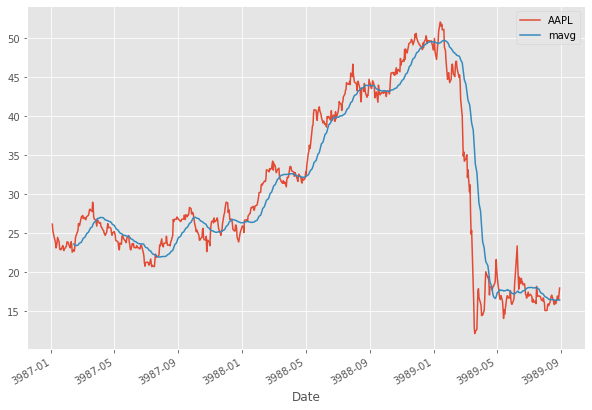

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
# # Autocorrelation and partical autocorrelation in the Lynx dataset
# # Two plots on one sheet

# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(mavg, lags=1000, ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = plot_pacf(mavg, lags=1000, ax=ax2)

C:\Users\hanif\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

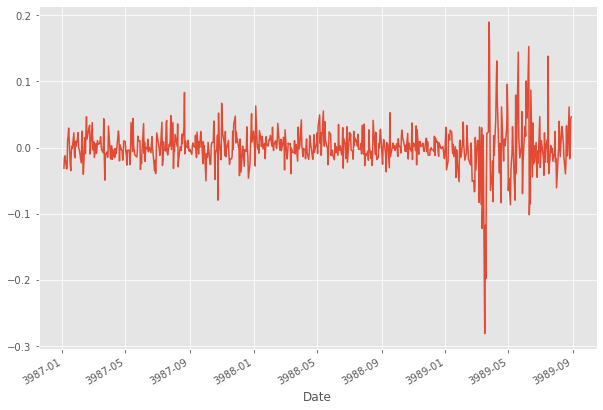

In [12]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [13]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-08-24,16.969999,7138499,5.008842,4.753077
2020-08-25,16.680000,4660719,5.155879,-2.456141
2020-08-26,16.500000,3812658,2.393931,-1.138409
2020-08-27,17.190001,9343146,3.432229,2.443384
2020-08-28,17.990000,8387496,3.835467,3.988443


In [14]:
dfreg.corr()

,Adj Close,Volume,HL_PCT,PCT_change
Adj Close,1.000000,-0.444646,-0.323789,0.131402
Volume,-0.444646,1.000000,0.646673,-0.146686
HL_PCT,-0.323789,0.646673,1.000000,-0.290032
PCT_change,0.131402,-0.146686,-0.290032,1.000000


In [15]:
import math
import numpy as np

#Drop missing value
dfreg.fillna(value=-99999, inplace=True)
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-08-24,16.969999,7138499,5.008842,4.753077
2020-08-25,16.680000,4660719,5.155879,-2.456141
2020-08-26,16.500000,3812658,2.393931,-1.138409
2020-08-27,17.190001,9343146,3.432229,2.443384
2020-08-28,17.990000,8387496,3.835467,3.988443


In [16]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_out

7

In [17]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
X

array([[ 2.61900005e+01,  9.77849000e+05,  1.56548239e+00,
         1.11969467e+00],
       [ 2.53700008e+01,  2.14617800e+06,  4.23728348e+00,
        -3.31554474e+00],
       [ 2.49899998e+01,  1.04962000e+06,  1.52061253e+00,
        -1.02970388e+00],
       ...,
       [ 1.65000000e+01,  3.81265800e+06,  2.39393061e+00,
        -1.13840939e+00],
       [ 1.71900005e+01,  9.34314600e+06,  3.43222882e+00,
         2.44338397e+00],
       [ 1.79899998e+01,  8.38749600e+06,  3.83546716e+00,
         3.98844257e+00]])

In [18]:
# Scale the X so that everyone can have the same distribution for linear regression
from sklearn import preprocessing

X = preprocessing.scale(X)
X

array([[-0.40777747, -0.48155355, -0.59477159,  0.45009975],
       [-0.48575218, -0.02700891,  0.14028439, -1.21803753],
       [-0.52188691, -0.45363066, -0.60711602, -0.35831024],
       ...,
       [-1.32921067,  0.62134404, -0.366852  , -0.39919546],
       [-1.26359773,  2.77300994, -0.08119926,  0.94795235],
       [-1.18752489,  2.40120921,  0.02973817,  1.52906412]])

In [19]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
X

array([[-0.40777747, -0.48155355, -0.59477159,  0.45009975],
       [-0.48575218, -0.02700891,  0.14028439, -1.21803753],
       [-0.52188691, -0.45363066, -0.60711602, -0.35831024],
       ...,
       [-1.3596398 ,  0.74106454,  0.3688234 , -1.61595287],
       [-1.38911809,  0.42143223, -0.05466586, -0.75990606],
       [-1.33967075,  0.86103442,  0.25024772,  1.26134043]])

In [20]:
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y

array([23.79000092, 24.48999977, 23.90999985, 23.06999969, 22.90999985,
       22.95999908, 22.93000031, 23.44000053, 23.15999985, 22.79999924,
       23.02000046, 23.05999947, 23.37999916, 23.90999985, 23.90999985,
       23.85000038, 23.70000076, 23.14999962, 23.36000061, 23.94000053,
       23.54000092, 22.59000015, 22.93000031, 22.71999931, 23.25      ,
       24.32999992, 24.63999939, 25.38999939, 26.25      , 25.98999977,
       25.98999977, 26.96999931, 27.17000008, 27.05999947, 27.29999924,
       26.88999939, 27.04999924, 26.80999947, 26.75      , 27.03000069,
       27.15999985, 27.31999969, 27.57999992, 28.03000069, 28.11000061,
       28.01000023, 27.79000092, 29.        , 28.57999992, 27.17000008,
       26.86000061, 26.68000031, 26.28000069, 25.93000031, 26.77000046,
       26.30999947, 26.28000069, 26.35000038, 25.87999916, 25.80999947,
       25.40999985, 25.36000061, 25.        , 24.95999908, 24.75      ,
       25.19000053, 25.81999969, 26.23999977, 25.70999908, 25.81

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# X_lat = X[-len(y_test):]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [24]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [25]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
# from sklearn import metrics
# y_pred = forest.predict(X_lat)
# forest.score(y_pred, y_test)

In [27]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [28]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
confiforest = forest.score(X_test, y_test)

In [29]:
confidencereg

0.9463263315690524

In [30]:
confidencepoly2

0.9574559052721889

In [31]:
confidencepoly3

0.9059396083295911

In [32]:
confidenceknn

0.925316813695751

In [33]:
confiforest

0.959709367883349

In [34]:
# forecast_set = clfreg.predict(X_lately)
forecast_set = forest.predict(X_lately)
dfreg['Forecast'] = np.nan

C:\Users\hanif\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\hanif\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


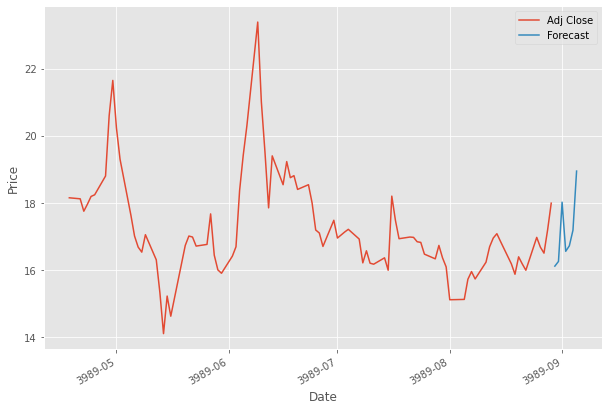

In [35]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(100).plot(gid=1)
dfreg['Forecast'].tail(100).plot(gid=1)
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [37]:
tail = dfreg.tail(30)
# dfreg.to_csv(x)
tail

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2020-06-03,18.370001,12157442.0,8.818730,7.868468,19.400000,NaN
2020-06-04,19.420000,15276733.0,6.951598,1.835346,18.540001,NaN
2020-06-05,20.290001,19742537.0,12.567763,-7.520509,19.230000,NaN
2020-06-08,23.389999,16674725.0,10.688329,6.803652,18.750000,NaN
2020-06-09,21.010000,14740665.0,8.186584,-5.573033,18.809999,NaN
2020-06-10,19.510000,12646157.0,8.559713,-4.829267,18.400000,NaN
2020-06-11,17.850000,12470911.0,9.971992,2.000002,18.540001,NaN
2020-06-12,19.400000,14378888.0,7.628864,0.258394,18.000000,NaN
2020-06-15,18.540001,10437549.0,6.364618,0.815669,17.190001,NaN


In [38]:
# df.to_csv(x)

In [39]:
oil = quandl.get("FRED/DCOILBRENTEU", authtoken='BMrYvzu7Vgow_zBBTE_k')
oil.tail()

,Value
Date,
2020-06-23,42.72
2020-06-24,40.40
2020-06-25,41.18
2020-06-26,40.97
2020-06-29,41.58


In [40]:
start = '2019-1-1'
# end = '2020-3-30'

In [41]:
usd = web.DataReader(['AC.TO', 'CAD=X'],
                        'yahoo', start=start, end=end)['Adj Close']

In [42]:
usd = usd.pct_change()
corr_usd = usd.corr()
corr_usd

Symbols,AC.TO,CAD=X
Symbols,,
AC.TO,1.000000,-0.225626
CAD=X,-0.225626,1.000000


In [43]:
USD_CAD = web.DataReader('CAD=X', 'yahoo', start , end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-29,17.690001,16.379999,16.840000,17.480000,5084406,17.480000
2020-06-30,17.459999,16.750000,17.379999,16.950001,5011477,16.950001
2020-07-02,17.400000,17.070000,17.260000,17.129999,4269568,17.129999
2020-07-03,17.309999,17.020000,17.150000,17.209999,1138989,17.209999
2020-07-06,17.540001,16.799999,17.400000,16.920000,3888597,16.920000


In [44]:
dfcomp2 = web.DataReader(['TRZ.TO', 'WJA.TO', 'CNI', 'EXPE', 'AAL', 'AC.TO', 'BZ=F'], 
                         'yahoo', start=start, end=end)['Adj Close']

dfcomp = web.DataReader(['AC.TO', 'TRZ.TO', 'DOL.TO', 'CNR.TO', 'BB.TO', 'GOOS.TO', 'BZ=F'],
                        'yahoo', start=start, end=end)['Adj Close']

C:\Users\hanif\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'WJA.TO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [45]:
retscomp2 = dfcomp2.pct_change()
corr2 = retscomp2.corr()
corr2

Symbols,TRZ.TO,CNI,EXPE,AAL,AC.TO,BZ=F,WJA.TO
Symbols,,,,,,,
TRZ.TO,1.000000,0.311453,0.330711,0.130845,0.400740,-0.014196,NaN
CNI,0.311453,1.000000,0.543992,0.420574,0.475554,0.234754,NaN
EXPE,0.330711,0.543992,1.000000,0.488694,0.617213,0.172300,NaN
AAL,0.130845,0.420574,0.488694,1.000000,0.565917,0.051224,NaN
AC.TO,0.400740,0.475554,0.617213,0.565917,1.000000,0.112216,NaN
BZ=F,-0.014196,0.234754,0.172300,0.051224,0.112216,1.000000,NaN
WJA.TO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
dfcomp.tail()

Symbols,AC.TO,TRZ.TO,DOL.TO,CNR.TO,BB.TO,GOOS.TO,BZ=F
Date,,,,,,,
2020-06-30,16.950001,5.73,45.160000,120.110001,6.62,31.520000,41.180000
2020-07-02,17.129999,5.60,45.490002,120.339996,6.60,31.389999,42.790001
2020-07-03,17.209999,5.55,45.389999,119.400002,6.62,31.200001,NaN
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,42.820000
2020-07-06,16.920000,5.65,45.470001,120.180000,6.79,31.660000,43.180000


In [47]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AC.TO,TRZ.TO,DOL.TO,CNR.TO,BB.TO,GOOS.TO,BZ=F
Symbols,,,,,,,
AC.TO,1.000000,0.400744,0.326424,0.431563,0.347031,0.409341,0.112204
TRZ.TO,0.400744,1.000000,0.184989,0.283754,0.256522,0.174431,-0.014213
DOL.TO,0.326424,0.184989,1.000000,0.451005,0.216142,0.317499,0.075349
CNR.TO,0.431563,0.283754,0.451005,1.000000,0.480980,0.508011,0.181779
BB.TO,0.347031,0.256522,0.216142,0.480980,1.000000,0.337294,0.195513
GOOS.TO,0.409341,0.174431,0.317499,0.508011,0.337294,1.000000,0.075012
BZ=F,0.112204,-0.014213,0.075349,0.181779,0.195513,0.075012,1.000000


In [48]:
corr[['AC.TO']]

Symbols,AC.TO
Symbols,
AC.TO,1.000000
TRZ.TO,0.400744
DOL.TO,0.326424
CNR.TO,0.431563
BB.TO,0.347031
GOOS.TO,0.409341
BZ=F,0.112204


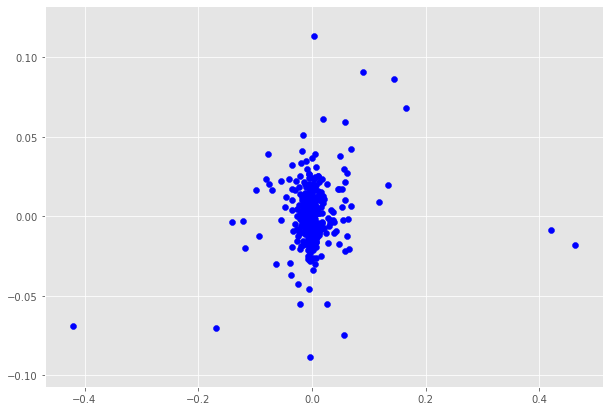

In [49]:
plt.scatter(retscomp['TRZ.TO'], retscomp['DOL.TO'], c='b')

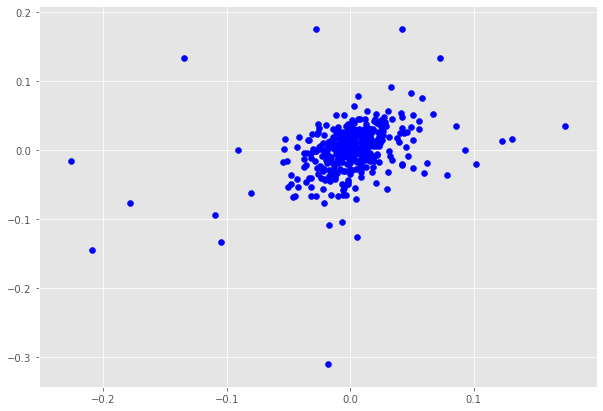

In [50]:
plt.scatter(retscomp['BB.TO'], retscomp['GOOS.TO'], c='b')

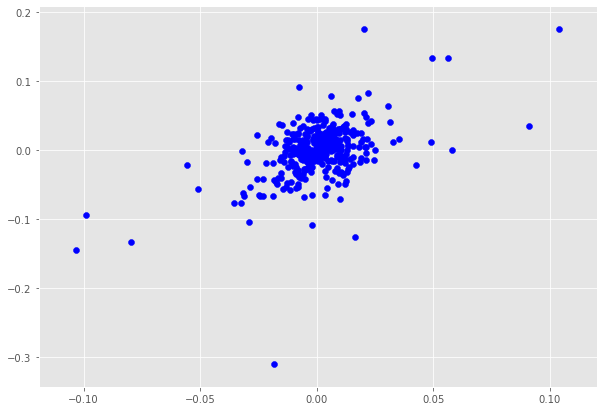

In [51]:
plt.scatter(retscomp['CNR.TO'], retscomp['GOOS.TO'], c='b')

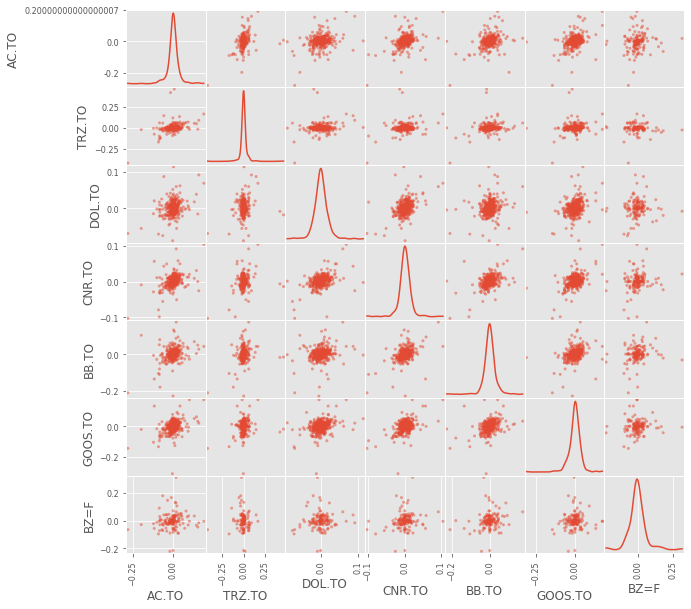

In [52]:
from pandas import plotting
plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

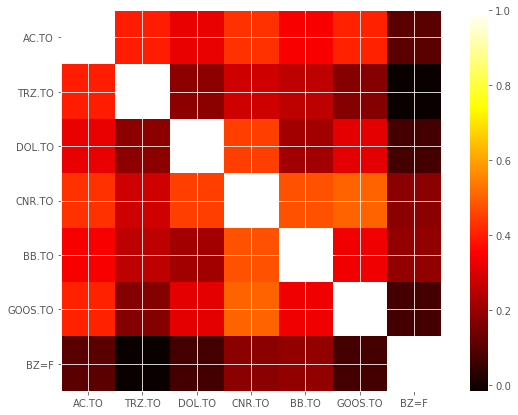

In [53]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

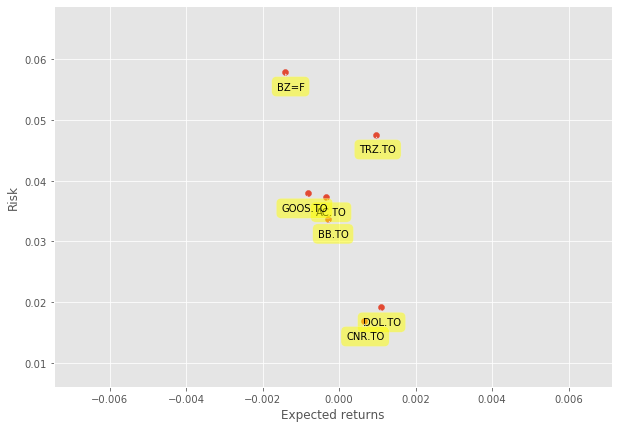

In [54]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [55]:
!curl -o time_corona.csv https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv?accessType=DOWNLOAD

In [56]:
path = "D:\Machine Learnaing\corona_live"
co = pd.read_csv(path+'\\time_corona.csv')
co.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [57]:
time_confirmed = co.groupby('Date')['Country/Region','Confirmed'].sum()
time_confirmed.tail()

C:\Users\hanif\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed
Date,
2020-05-26,5589626.0
2020-05-27,5691790.0
2020-05-28,5808946.0
2020-05-29,5924275.0
2020-05-30,6059017.0


In [58]:
time_confirmed.to_csv('time_confirmed.csv')

In [59]:
corona = pd.read_csv('D:\Machine Learnaing\corona_live\\time_confirmed.csv')
corona.tail()

,Date,Confirmed
125,2020-05-26,5589626.0
126,2020-05-27,5691790.0
127,2020-05-28,5808946.0
128,2020-05-29,5924275.0
129,2020-05-30,6059017.0


In [60]:
len(corona)

130

In [61]:
corona = corona.groupby('Date')['Date', 'Confirmed'].sum()
corona = corona.reset_index()
corona.tail()

C:\Users\hanif\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Confirmed
125,2020-05-26,5589626.0
126,2020-05-27,5691790.0
127,2020-05-28,5808946.0
128,2020-05-29,5924275.0
129,2020-05-30,6059017.0


In [62]:
df_2020 = df[df.index > '2020-01-21']

In [63]:
df_2020.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-29,17.690001,16.379999,16.840000,17.480000,5084406,17.480000
2020-06-30,17.459999,16.750000,17.379999,16.950001,5011477,16.950001
2020-07-02,17.400000,17.070000,17.260000,17.129999,4269568,17.129999
2020-07-03,17.309999,17.020000,17.150000,17.209999,1138989,17.209999
2020-07-06,17.540001,16.799999,17.400000,16.920000,3888597,16.920000


In [64]:
df_20Close = df_2020[['Adj Close']]
# df_20Close.to_csv('D:\Machine Learnaing\corona_v\\2020.csv')

In [65]:
df_20C = df_20Close.reset_index()
df_20C.head()

,Date,Adj Close
0,2020-01-22,48.680000
1,2020-01-23,48.419998
2,2020-01-24,47.180000
3,2020-01-27,44.740002
4,2020-01-28,45.099998


In [66]:
cp = pd.read_csv('D:\Machine Learnaing\stock\confi_price.csv')
cp = cp[['Confirmed', 'Price']]
cp.head()

,Confirmed,Price
0,555,48.680000
1,654,48.419998
2,941,47.180000
3,1434,47.180000
4,2118,47.180000


In [67]:
cp.corr()

,Confirmed,Price
Confirmed,1.000000,-0.727802
Price,-0.727802,1.000000


# Airlines in Defrent cuntinent

In [68]:
dfcomp = web.DataReader(['AC.TO', 'JAPSY'],
                        'yahoo', start=start, end=end)['Adj Close']

In [69]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AC.TO,JAPSY
Symbols,,
AC.TO,1.000000,0.437382
JAPSY,0.437382,1.000000


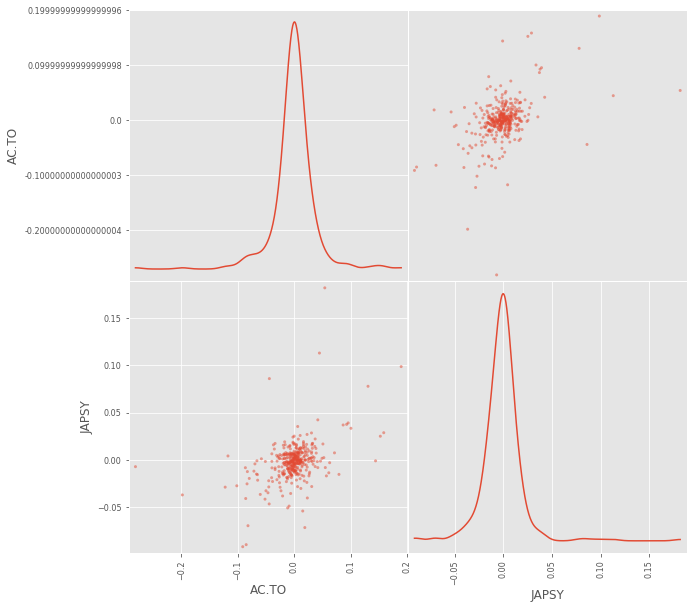

In [70]:
from pandas import plotting
plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

In [71]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

Ac = web.DataReader(var, 'yahoo', start , end)
Ac.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,26.209999,25.799999,25.90,26.190001,977849,26.190001
2018-01-03,26.240000,25.165001,26.24,25.370001,2146178,25.370001
2018-01-04,25.360001,24.980000,25.25,24.990000,1049620,24.990000
2018-01-05,25.090000,24.520000,25.08,24.680000,1059440,24.680000
2018-01-08,24.730000,23.700001,24.73,23.879999,1265645,23.879999


In [72]:
Ac.describe()

,High,Low,Open,Close,Volume,Adj Close
count,631.000000,631.000000,631.000000,631.000000,6.310000e+02,631.000000
mean,31.842948,30.809033,31.324453,31.319968,2.069963e+06,31.319968
std,10.250576,10.203096,10.178959,10.243073,2.526882e+06,10.243073
min,13.740000,9.260000,13.060000,12.150000,1.457940e+05,12.150000
25%,24.185000,23.395000,23.730000,23.825000,8.760595e+05,23.825000
50%,27.830000,27.000000,27.389999,27.400000,1.184657e+06,27.400000
75%,41.945000,40.850000,41.285000,41.610001,1.815078e+06,41.610001
max,52.709999,51.560001,52.029999,52.090000,1.974254e+07,52.090000
